<a href="https://colab.research.google.com/github/SUDEEPPATNAYAK/BIG-DATA-ANALYTICS/blob/main/predictive1C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving large_sales_data.csv to large_sales_data (2).csv
MONTH-WISE PROFIT WITH PREDICTION
     Month  Profit  Prev_Month_Profit                Prediction
0  2024-01  763909                NaN          No Previous Data
1  2024-02  689548           763909.0    Likely Loss Next Month
2  2024-03  701993           689548.0  Likely Profit Next Month
3  2024-04  730799           701993.0  Likely Profit Next Month
4  2024-05  100916           730799.0    Likely Loss Next Month





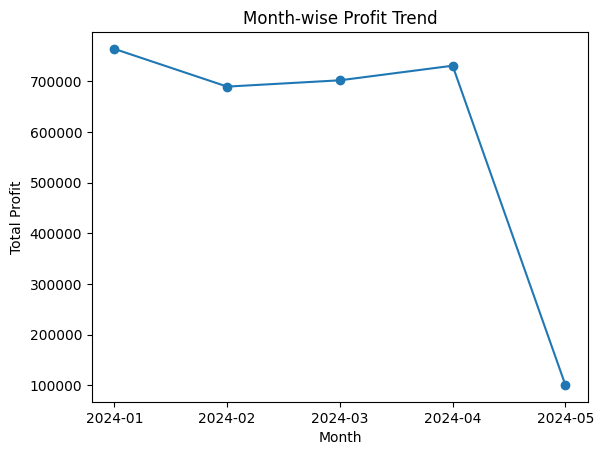

In [ ]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
uploaded = files.upload()
df = pd.read_csv(list(uploaded.keys())[0])

df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.to_period('M')

monthly_profit = df.groupby('Month')['Profit'].sum().reset_index()
monthly_profit['Prev_Month_Profit'] = monthly_profit['Profit'].shift(1)
def predict_next(row):
    if pd.isna(row['Prev_Month_Profit']):
        return "No Previous Data"
    elif row['Profit'] >= row['Prev_Month_Profit']:
        return "Likely Profit Next Month"
    else:
        return "Likely Loss Next Month"

monthly_profit['Prediction'] = monthly_profit.apply(predict_next, axis=1)
print("MONTH-WISE PROFIT WITH PREDICTION")
print(monthly_profit)
print("\n\n")

monthly_profit['Month'] = monthly_profit['Month'].astype(str)
plt.plot(monthly_profit['Month'], monthly_profit['Profit'], marker='o')

plt.title("Month-wise Profit Trend")
plt.xlabel("Month")
plt.ylabel("Total Profit")
plt.show()